In [1]:
import stats
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
dl = stats.get_data_active("TritonmanDraftLegal2025")

In [3]:
dl.rename(columns={"Swim": "Run1", "Run": "Run2"}, inplace=True)

In [4]:
dl[dl.Gender == "Male"]

,Name,Gender,Age,Run1,T1,Bike,T2,Run2,Total
0,Edoardo Giuseppe Leone,Male,23,00:05:34,00:00:22,00:30:27,00:00:22,00:15:16,00:52:02
1,Matheus Menezes,Male,23,00:05:33,00:00:25,00:30:31,00:00:25,00:15:07,00:52:03
2,Nathan Cohen,Male,27,00:05:38,00:00:18,00:30:23,00:00:19,00:15:56,00:52:36
3,Wiktor Rajca,Male,23,00:05:38,00:00:27,00:30:22,00:00:30,00:15:48,00:52:47
4,Nicholas Dorn,Male,25,00:05:37,00:00:27,00:30:22,00:00:26,00:16:02,00:52:56
...,...,...,...,...,...,...,...,...,...
85,Ryan Mongan,Male,59,00:07:23,00:00:28,00:37:04,00:00:36,00:20:54,01:06:29
86,Miguel Reyes,Male,21,00:06:38,00:00:46,00:38:54,00:00:55,00:20:10,01:07:25
87,Jairo Alejandro Angel Escobar,Male,34,00:07:09,00:00:40,00:38:28,00:00:35,00:20:36,01:07:31
90,Leo Tian,Male,19,00:06:51,00:00:54,00:38:33,00:00:38,00:20:45,01:07:43


In [5]:
dl[dl.Gender == "Female"].head()

,Name,Gender,Age,Run1,T1,Bike,T2,Run2,Total
47,Bella Chirafisi,Female,23,00:06:23,00:00:37,00:34:28,00:00:38,00:17:38,00:59:45
48,Annie Meeder,Female,26,00:06:23,00:00:32,00:34:31,00:00:36,00:17:55,00:59:59
49,Erica Szczechowski,Female,27,00:06:23,00:00:35,00:34:30,00:00:54,00:17:42,01:00:06
54,Madeline Tapp,Female,23,00:06:24,00:00:33,00:34:32,00:00:36,00:19:31,01:01:37
56,Kasey Madsen,Female,24,00:06:30,00:00:40,00:35:42,00:00:52,00:18:16,01:02:02


In [6]:
dl.dtypes

Name      object
Gender    object
Age       object
Run1      object
T1        object
Bike      object
T2        object
Run2      object
Total     object
dtype: object

In [7]:
dl.replace("--", None, inplace=True)
dl.sort_values(by=["Run2"])

,Name,Gender,Age,Run1,T1,Bike,T2,Run2,Total
1,Matheus Menezes,Male,23,00:05:33,00:00:25,00:30:31,00:00:25,00:15:07,00:52:03
0,Edoardo Giuseppe Leone,Male,23,00:05:34,00:00:22,00:30:27,00:00:22,00:15:16,00:52:02
3,Wiktor Rajca,Male,23,00:05:38,00:00:27,00:30:22,00:00:30,00:15:48,00:52:47
2,Nathan Cohen,Male,27,00:05:38,00:00:18,00:30:23,00:00:19,00:15:56,00:52:36
4,Nicholas Dorn,Male,25,00:05:37,00:00:27,00:30:22,00:00:26,00:16:02,00:52:56
...,...,...,...,...,...,...,...,...,...
110,Michaela Sumortin,Female,21,00:08:47,00:00:43,00:41:07,00:00:40,00:26:42,01:18:01
108,Aj Cuddeback,Female,26,00:08:46,00:00:38,00:39:42,00:00:34,00:27:10,01:16:52
111,Miisa Makela,Female,23,00:09:29,00:00:38,00:44:11,00:00:49,00:28:35,01:23:44
15,Rayan Jamshidian,Male,22,00:05:56,None,None,None,None,00:55:00


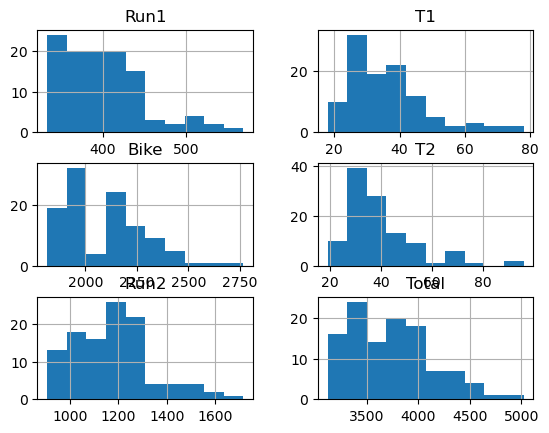

In [8]:

dl_timedelta = dl.astype({"Run1": "timedelta64[s]",
                          "T1": "timedelta64[s]",
                          "Bike": "timedelta64[s]",
                          "T2": "timedelta64[s]",
                          "Run2": "timedelta64[s]",
                          "Total": "timedelta64[s]"})
dl_seconds = dl_timedelta.apply(lambda col: col.dt.total_seconds() if col.dtype == "timedelta64[s]" else col)
dl_seconds.hist();

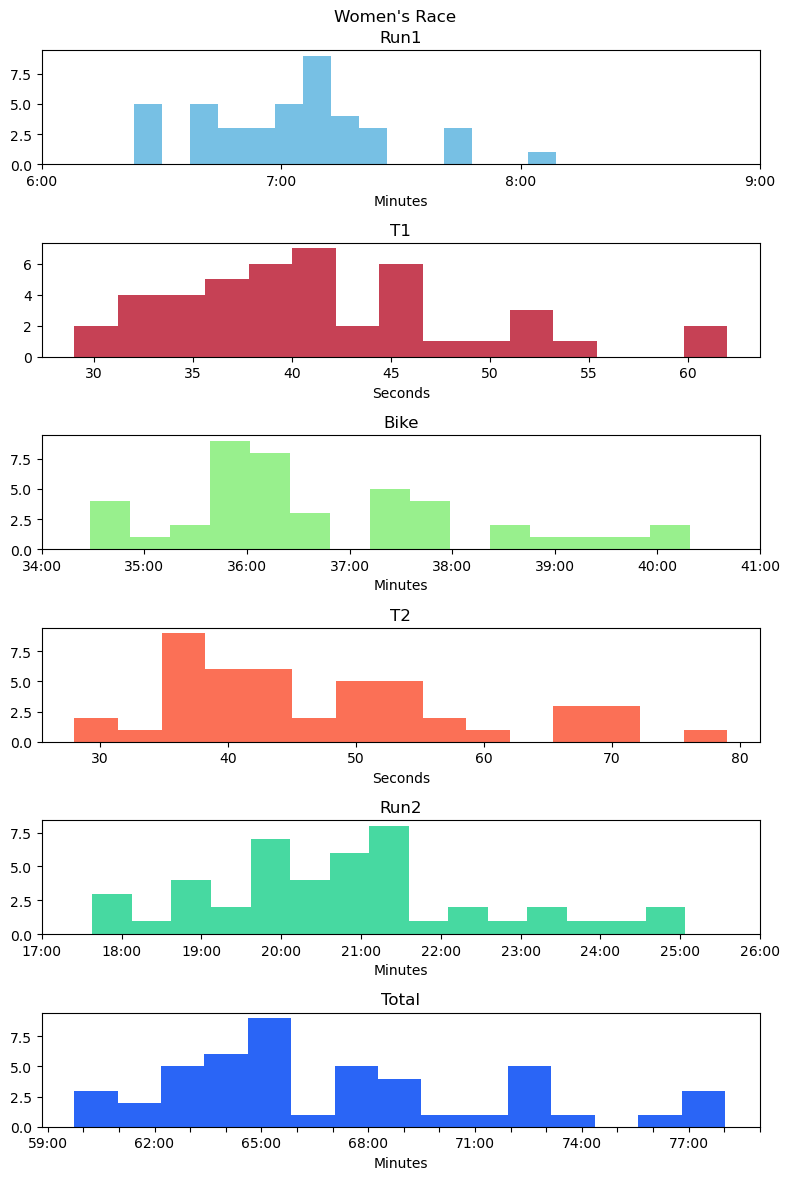

In [9]:
def get_histograms(race, gender):
    # Grab subset of data based on input
    df = race[race.Gender == gender].copy()

    # Convert to timedelta and then seconds
    df_timedelta = df.astype({"Run1": "timedelta64[s]",
                          "T1": "timedelta64[s]",
                          "Bike": "timedelta64[s]",
                          "T2": "timedelta64[s]",
                          "Run2": "timedelta64[s]",
                          "Total": "timedelta64[s]"})
    df_seconds = df_timedelta.apply(lambda col: col.dt.total_seconds() if col.dtype == "timedelta64[s]" else col)
    
    fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(8, 12))
    for i, column in enumerate(df_seconds.columns[3:]):
        # Drop outliers
        Q1 = df_seconds[column].quantile(0.25)
        Q3 = df_seconds[column].quantile(0.75)
        IQR = Q3 - Q1
        df_seconds[column] = df_seconds[column][(df_seconds[column] > (Q1 - 1.5*IQR))
                                                & (df_seconds[column] < (Q3 + 1.5*IQR))]

        # Use Freedman-Diaconis rule to determine number of bins
        bw = 2 * IQR * len(df_seconds)**(-1/3)
        bins = int((df_seconds[column].max() - df_seconds[column].min()) / bw)
        # Adjust
        bins = int(3 * bins)

        # Generate random colors for each chart
        color = (random.random(), random.random(), random.random())

        # Plot histogram for each leg
        ax[i].hist(
            df_seconds[column],
            bins=bins,
            color=color
            )
        
        # Convert x-axis labels from seconds to minutes for non-transition legs
        if column != "T1" and column != "T2":
            interval = 60
            xmax = df_seconds[column].max() + interval
            xmin = df_seconds[column].min() - interval
            count = int((xmax - xmin) / interval)  # Determine optimal number of ticks
            xmin_pos = int(xmin / interval) + 1
            # Determine positions of each tick
            positions = [x * interval for x in range(xmin_pos, xmin_pos + count + 1)]
            if len(positions) > 50:  # Label every three ticks if too many ticks
                labels = [f"{x // 60}:{x % 60:02}" if i % 5 == 0 else " " for i, x in enumerate(positions)]
            elif len(positions) > 20:  # Label every three ticks if too many ticks
                labels = [f"{x // 60}:{x % 60:02}" if i % 3 == 0 else " " for i, x in enumerate(positions)]
            elif len(positions) > 10: # Two for moderate number of ticks
                labels = [f"{x // 60}:{x % 60:02}" if i % 2 == 0 else " " for i, x in enumerate(positions)]
            else:  # Otherwise label every tick
                labels = [f"{x // 60}:{x % 60:02}" for x in positions]
            ax[i].set_xticks(positions)
            ax[i].set_xticklabels(labels)
            ax[i].set_xlabel("Minutes")
        else:
            ax[i].set_xlabel("Seconds")
        ax[i].set_title(column)

    # Set title
    if gender == "Female":
        title = "Women's Race"
    if gender == "Male":
        title = "Men's Race"
    fig.suptitle(title)

    plt.tight_layout()
    plt.show()


get_histograms(dl, "Female")

In [10]:
classic = stats.get_data_active("TritonmanClassic2025")

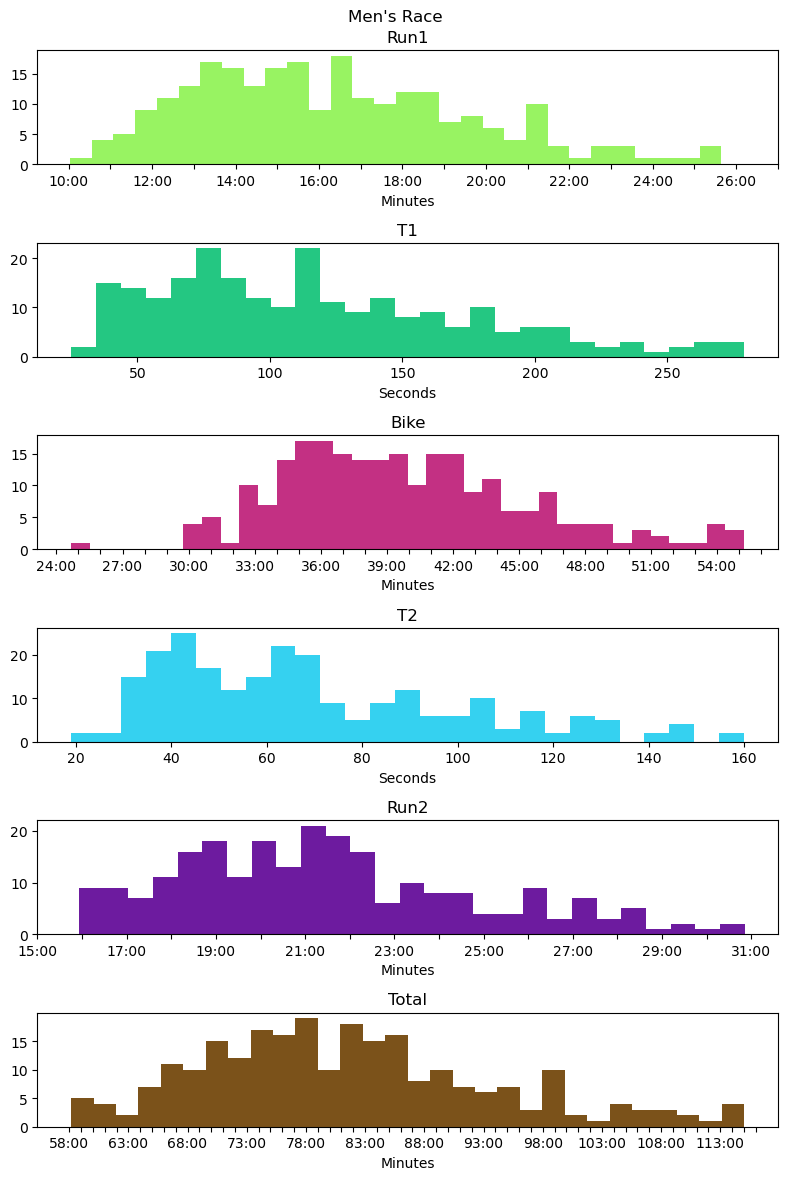

In [11]:
classic.rename(columns={"Swim": "Run1", "Run": "Run2"}, inplace=True)
classic.replace("--", None, inplace=True)
get_histograms(classic, "Male")

In [23]:
def get_position(df):
    df = df.copy()
    df.dropna(inplace=True)
    df = df.astype({"Run1": "timedelta64[s]",
                        "T1": "timedelta64[s]",
                        "Bike": "timedelta64[s]",
                        "T2": "timedelta64[s]",
                        "Run2": "timedelta64[s]",
                        "Total": "timedelta64[s]"})
    for i, column in enumerate(df.columns[3:7]):
        if f"Overall Time {i}" in df.columns:
            df[f"Overall Time {i+1}"] = df[column] + df[f"Overall Time {i}"]
        else:
            df[f"Overall Time {i+1}"] = df[column]
        df.sort_values(by=f"Overall Time {i+1}", inplace=True)
        df.reset_index(drop=True, inplace=True)
        df[f"Position {i+1}"] = df.index + 1
    df.drop(columns=["Run1", "T1", "Bike", "T2", "Run2", "Total"], inplace=True)

    return df

test = get_position(dl)
test

,Name,Gender,Age,Overall Time 1,Position 1,Overall Time 2,Position 2,Overall Time 3,Position 3,Overall Time 4,Position 4
0,Nathan Cohen,Male,27,0 days 00:05:38,8,0 days 00:05:56,3,0 days 00:36:19,1,0 days 00:36:38,1
1,Edoardo Giuseppe Leone,Male,23,0 days 00:05:34,3,0 days 00:05:56,2,0 days 00:36:23,2,0 days 00:36:45,2
2,Bernardo Moreno,Male,25,0 days 00:05:47,19,0 days 00:06:08,15,0 days 00:36:23,4,0 days 00:36:45,3
3,Colter Purcell,Male,22,0 days 00:05:38,10,0 days 00:06:01,7,0 days 00:36:23,3,0 days 00:36:50,4
4,Oliver Pilon,Male,23,0 days 00:05:37,7,0 days 00:06:01,6,0 days 00:36:24,6,0 days 00:36:51,5
...,...,...,...,...,...,...,...,...,...,...,...
104,Sarah Stutsman,Female,20,0 days 00:07:14,91,0 days 00:07:54,84,0 days 00:50:25,105,0 days 00:51:06,105
105,Michaela Sumortin,Female,21,0 days 00:08:47,108,0 days 00:09:30,107,0 days 00:50:37,107,0 days 00:51:17,106
106,Kasey Edwards,Female,30,0 days 00:08:30,105,0 days 00:09:40,108,0 days 00:50:36,106,0 days 00:52:05,107
107,Miisa Makela,Female,23,0 days 00:09:29,109,0 days 00:10:07,109,0 days 00:54:18,109,0 days 00:55:07,108
